## SMS Spam Classifier: Bernoulli Naive Bayes

The notebook is divided into the following sections:
1. Importing and preprocessing data
2. Building the model: Bernoulli Naive Bayes

In [11]:
import pandas as pd
docs = pd.read_csv('movie_review_train.csv')
docs.head()

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...


In [25]:
# reading the training data
test_docs = pd.read_csv('movie_review_test.csv')
test_docs.head()

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...


In [14]:
#df.column_name.value_counts() - gives no. of unique inputs in that columns
docs['class'].value_counts()

Pos    800
Neg    800
Name: class, dtype: int64

In [ ]:
# counting spam and ham instances
ham_spam = docs['class'].value_counts()
ham_spam

In [26]:
# counting spam and ham instances
ham_spam = test_docs['class'].value_counts()
ham_spam

Pos    200
Neg    200
Name: class, dtype: int64

In [27]:
print("Spam % is ",(ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100)

Spam % is  50.0


In [17]:
# mapping labels to 1 and 0
docs['label'] = docs['class'].map({'Neg':0, 'Pos':1})

In [28]:
# mapping labels to 0 and 1
test_docs['label'] = test_docs['class'].map({'Neg':0, 'Pos':1})

In [18]:
docs.head()

,class,text,label
0,Pos,a common complaint amongst film critics is ...,1
1,Pos,whew this film oozes energy the kind of b...,1
2,Pos,steven spielberg s amistad which is bas...,1
3,Pos,he has spent his entire life in an awful litt...,1
4,Pos,being that it is a foreign language film with...,1


In [19]:
X_train=docs.text
y_train=docs.label

In [29]:
# convert to X and y
X_test = test_docs.text
y_test = test_docs.label
print(X_test.shape)
print(y_test.shape)

(400,)
(400,)


In [20]:

print(X_train.shape)
print(y_train.shape)

(1600,)
(1600,)


In [10]:
# splitting into test and train

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
X_train.head()

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorising the text
vect = CountVectorizer(stop_words='english', min_df=.03, max_df=.8)

In [22]:
vect.fit(X_train)

CountVectorizer(max_df=0.8, min_df=0.03, stop_words='english')

In [23]:
vect.vocabulary_

{'common': 264,
 'critics': 323,
 'aren': 78,
 'available': 101,
 'gives': 618,
 'hope': 693,
 'art': 81,
 'writing': 1632,
 'isn': 753,
 'dead': 342,
 'hollywood': 690,
 'need': 970,
 'look': 853,
 'films': 549,
 'content': 287,
 'paul': 1037,
 'script': 1248,
 'takes': 1429,
 'thriller': 1471,
 'late': 805,
 'delivers': 357,
 'telling': 1449,
 'post': 1089,
 'war': 1571,
 'american': 59,
 'dream': 413,
 'tv': 1512,
 'radio': 1145,
 'heavy': 673,
 'direction': 386,
 'robert': 1205,
 'performances': 1043,
 'john': 766,
 'rob': 1204,
 'perfectly': 1041,
 'usually': 1537,
 'quality': 1136,
 'sets': 1272,
 'camera': 192,
 'work': 1618,
 'recent': 1165,
 'century': 213,
 'period': 1044,
 'pieces': 1056,
 'years': 1638,
 'old': 1001,
 'images': 716,
 'true': 1502,
 'era': 464,
 'generation': 605,
 'gone': 625,
 '15': 4,
 'world': 1623,
 'themes': 1461,
 'good': 626,
 'life': 831,
 'family': 508,
 'match': 894,
 'father': 521,
 'fame': 506,
 'audience': 99,
 'appear': 72,
 'familiar': 507,
 

In [24]:
vect.get_feature_names()

['000',
 '10',
 '100',
 '13',
 '15',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '20',
 '30',
 '80',
 '90',
 'ability',
 'able',
 'absolutely',
 'academy',
 'accent',
 'accept',
 'accident',
 'act',
 'acted',
 'acting',
 'action',
 'actions',
 'actor',
 'actors',
 'actress',
 'acts',
 'actual',
 'actually',
 'adaptation',
 'add',
 'added',
 'addition',
 'adds',
 'admit',
 'adult',
 'adults',
 'adventure',
 'affair',
 'age',
 'agent',
 'ago',
 'agree',
 'agrees',
 'ahead',
 'air',
 'albeit',
 'alien',
 'aliens',
 'alive',
 'allen',
 'allow',
 'allowed',
 'allows',
 'amazing',
 'america',
 'american',
 'amusing',
 'animated',
 'animation',
 'annoying',
 'answer',
 'anti',
 'apart',
 'apartment',
 'apparent',
 'apparently',
 'appeal',
 'appealing',
 'appear',
 'appearance',
 'appears',
 'appreciate',
 'approach',
 'appropriate',
 'aren',
 'army',
 'arrives',
 'art',
 'artist',
 'aside',
 'ask',
 'asked',
 'asking',
 'asks',
 'aspect',
 'aspects',
 'ass',
 'assistant',
 'atmosphere',
 'a

In [30]:
# transform
X_train_transformed = vect.transform(X_train)
X_test_tranformed =vect.transform(X_test)

In [31]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = bnb.predict(X_test_tranformed)

# predict probability
y_pred_proba =bnb.predict_proba(X_test_tranformed)

# accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)


0.79

In [32]:
bnb

BernoulliNB()

In [33]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[177,  23],
       [ 61, 139]], dtype=int64)

In [20]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[1207    1]
 [  31  154]]


In [21]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.8324324324324325


In [22]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

specificity 0.9991721854304636


In [23]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.9935483870967742
0.9935483870967742


In [24]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.9935483870967742
PRECISION SCORE : 0.9935483870967742
RECALL SCORE : 0.8324324324324325
F1 SCORE : 0.9058823529411765


In [25]:
y_pred_proba

array([[1.00000000e+00, 1.54647985e-10],
       [1.00000000e+00, 1.69177313e-10],
       [9.99999997e-01, 2.52488636e-09],
       ...,
       [9.99994219e-01, 5.78141360e-06],
       [3.64570741e-06, 9.99996354e-01],
       [1.00000000e+00, 2.90374743e-12]])

In [26]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [27]:
print (roc_auc)

0.9967692858421334


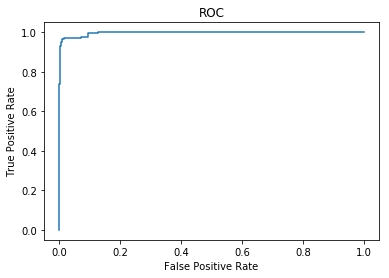

In [31]:
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)